In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


sns.set_style("darkgrid")
plt.style.use('csdh.mplstyle')

In [2]:
DATA_FILENAME = "csdh.csv"
DATA_FILEPATH = "/Users/callum/Uni/GitHubRepos/surviving-the-icu/datasets/drain_data/" + DATA_FILENAME

In [3]:
csdh = pd.read_csv(DATA_FILEPATH).iloc[:,1:] # drop first index column

In [4]:
print(f"The datset has a total of {csdh.shape[0]} distinct patients each with {csdh.shape[1]} measured covariates.")

The datset has a total of 763 distinct patients each with 53 measured covariates.


In [5]:
csdh.tail(20)

,age,sex,hospital,diabetes,dementia,copd,stroke,ihd,arrhythmia,epilepsy,...,burrhole_num,surgeon,anaesthetic,csdhcolour,drain,drain_end,drain_entry,drain_days,timetoop_corrected,recurrence
743,93,0,9,1,1,0,0,0,0,0,...,2,3,1,1.0,1,1.0,2.0,2.0,1.0,0.0
744,94,1,21,0,0,0,0,0,1,0,...,1,3,1,1.0,0,NaN,NaN,NaN,2.0,0.0
745,94,1,5,0,0,0,1,0,0,0,...,2,3,1,4.0,1,1.0,2.0,1.0,2.0,0.0
746,94,0,5,0,1,0,0,1,0,0,...,>3,3,1,1.0,1,1.0,2.0,1.0,2.0,0.0
747,94,1,18,0,0,0,0,1,1,0,...,2,2,2,1.0,1,2.0,2.0,2.0,2.0,0.0
748,92,0,13,0,0,0,1,0,0,0,...,2,2,1,1.0,1,1.0,1.0,3.0,0.0,0.0
749,94,1,6,1,0,0,0,1,0,0,...,2,3,1,2.0,1,1.0,NaN,2.0,2.0,1.0
750,94,0,6,0,1,0,1,1,0,0,...,1,3,2,2.0,0,NaN,NaN,NaN,1.0,0.0
751,94,1,4,0,0,0,0,0,0,0,...,1,3,2,1.0,0,NaN,NaN,NaN,1.0,0.0
752,94,1,11,1,0,0,1,0,0,0,...,1,3,2,1.0,1,1.0,1.0,2.0,0.0,0.0


In [6]:
csdh.keys()

Index(['age', 'sex', 'hospital', 'diabetes', 'dementia', 'copd', 'stroke',
       'ihd', 'arrhythmia', 'epilepsy', 'shunt', 'malignancy', 'metalvalve',
       'headinjury', 'residence', 'mobility', 'adm_mrs', 'adm_cogimpair',
       'adm_seizure', 'adm_incontinence', 'adm_gait', 'adm_dysphasia',
       'adm_hemiparesis', 'adm_headache', 'adm_facialdroop', 'gcs_e', 'gcs_v',
       'gcs_m', 'gcs_preop', 'platelet', 'inr', 'antithrombotics', 'warfarin',
       'antiplatelet', 'laterality', 'thickness_r', 'thickness_l',
       'thickness_cleaned', 'midlineshift', 'density', 'membranes', 'steroid',
       'optype', 'burrhole_num', 'surgeon', 'anaesthetic', 'csdhcolour',
       'drain', 'drain_end', 'drain_entry', 'drain_days', 'timetoop_corrected',
       'recurrence'],
      dtype='object')

In [7]:
reduced_cols = ['age', 'sex', 'hospital', 'surgeon', 'drain', 'optype']

In [8]:
viz_df = csdh.copy()[reduced_cols]

In [9]:
viz_df.tail(10)

,age,sex,hospital,surgeon,drain,optype
753,94,0,11,3,1,1
754,94,0,24,3,1,1
755,95,1,5,3,1,1
756,95,1,4,3,1,1
757,95,0,19,3,1,1
758,96,0,18,2,1,1
759,96,0,3,2,1,1
760,97,1,4,3,1,1
761,98,1,18,2,1,1
762,99,1,6,3,1,1


---
# DataViz Begins...

## Distributional Summary

In [10]:
print(f"The median patient age is {viz_df.age.median()}")

The median patient age is 77.0


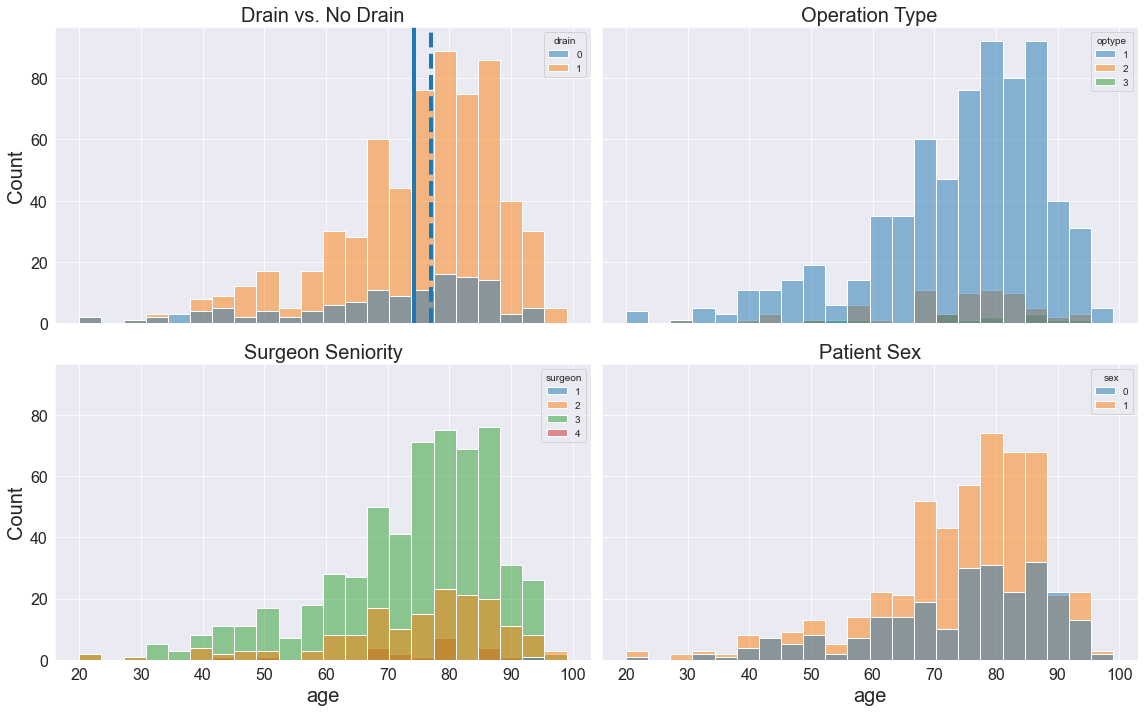

In [11]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 10), sharex=True, sharey=True)

# ax1
sns.histplot(data = viz_df, x='age', hue='drain', ax=ax1, palette='tab10')
ax1.axvline(viz_df.age.mean(), lw=4, label='mean')
ax1.axvline(viz_df.age.median(), ls='--', lw=4, label='median')
ax1.set_title('Drain vs. No Drain')

# ax2
sns.histplot(data = viz_df, x='age', hue='optype', palette='tab10', ax=ax2)
ax2.set_title('Operation Type')

# ax3
sns.histplot(data = viz_df, x='age', hue='surgeon', palette='tab10', ax=ax3)
ax3.set_title('Surgeon Seniority')

# ax4
sns.histplot(data = viz_df, x='age', hue='sex', palette='tab10', ax=ax4)
ax4.set_title('Patient Sex')

plt.tight_layout()
plt.show()

## Categorical Summary

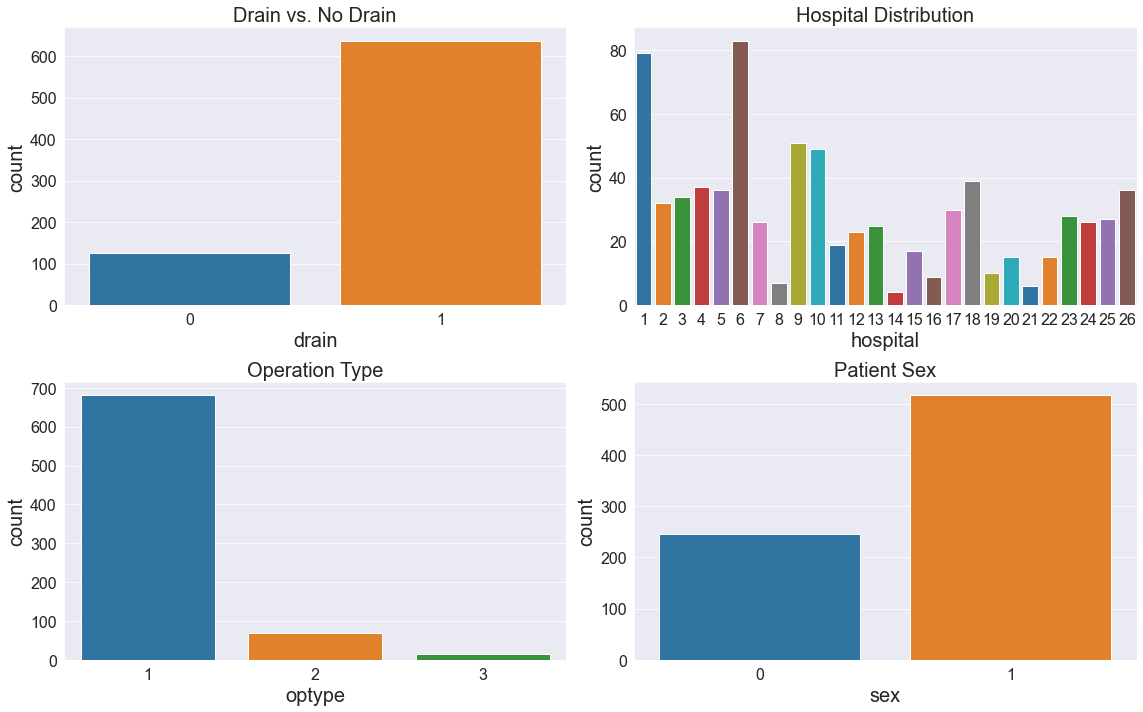

In [12]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 10))

# ax1
sns.countplot(data=viz_df, x='drain', palette='tab10', ax=ax1)
ax1.set_title('Drain vs. No Drain')

# ax2
sns.countplot(data=viz_df, x='hospital',palette='tab10', ax=ax2)
ax2.set_title('Hospital Distribution')

# ax3
sns.countplot(data=viz_df, x='optype', palette='tab10', ax=ax3)
ax3.set_title('Operation Type')

# ax4
sns.countplot(data = viz_df, x='sex', palette='tab10', ax=ax4)
ax4.set_title('Patient Sex')

plt.tight_layout()
plt.show()

# Missing Data

In [13]:
md_df = csdh.groupby('drain')
md_df = md_df.apply(lambda x: x.isna().sum())

In [14]:
md_df = md_df.loc[:, (md_df != 0).any(axis=0)].transpose()

In [15]:
md_df.loc[:,'total'] = md_df.sum(axis=1)

In [16]:
md_df = md_df.reset_index().rename(columns={'index':'covariate', 0:'no_drain', 1:'drained'})

In [17]:
md_df = md_df.sort_values(by='total', ascending=False)

In [18]:
md_df

drain,covariate,no_drain,drained,total
0,thickness_cleaned,41,227,268
4,drain_entry,126,102,228
3,drain_end,126,0,126
5,drain_days,126,0,126
1,burrhole_num,17,37,54
7,recurrence,3,15,18
2,csdhcolour,1,0,1
6,timetoop_corrected,0,1,1


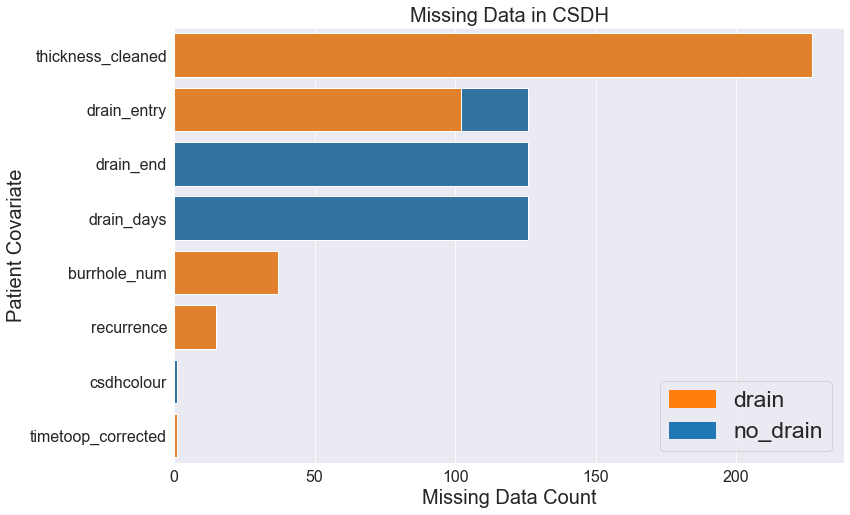

In [30]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
s1 = sns.barplot(y='covariate', x='no_drain', data=md_df, color=sns.color_palette('tab10')[0])
s2 = sns.barplot(y='covariate', x='drained', data=md_df, color=sns.color_palette('tab10')[1])
ax.set(xlabel='Missing Data Count', ylabel='Patient Covariate', title='Missing Data in CSDH')
drain_patch = mpatches.Patch(color=sns.color_palette('tab10')[1], label='drain')
no_drain_patch = mpatches.Patch(color=sns.color_palette('tab10')[0], label='no_drain')

ax.legend(handles=[drain_patch, no_drain_patch], loc='lower right', fontsize=23)
plt.show()

### `thickness_cleaned` has many missing datapoints - as expected - since this variables measures the maximal thickness of the hematoma on either side of the patient's brain if CSDH is present on both sides. We can hence safely ignore the `NaN`s for this variable then.

### We observe that the drain related variabes have a very high count of missing data but most of this originates from the `no_drain` subset. However, a substantial amount of missing data for the `drain_entry` variable even when the patient received the `drain` treatment. Why is this? How can we correct for this if this variable is important in the DAG? Note: Michael said hospital may be useful to impute drain_entry.


### Another point of concern is the missing data in perhaps the most important `recurrence` variable. Not sure how to approach this one --> maybe < 20 people can be safely dropped from the dataset. 

---

# DAG Variables

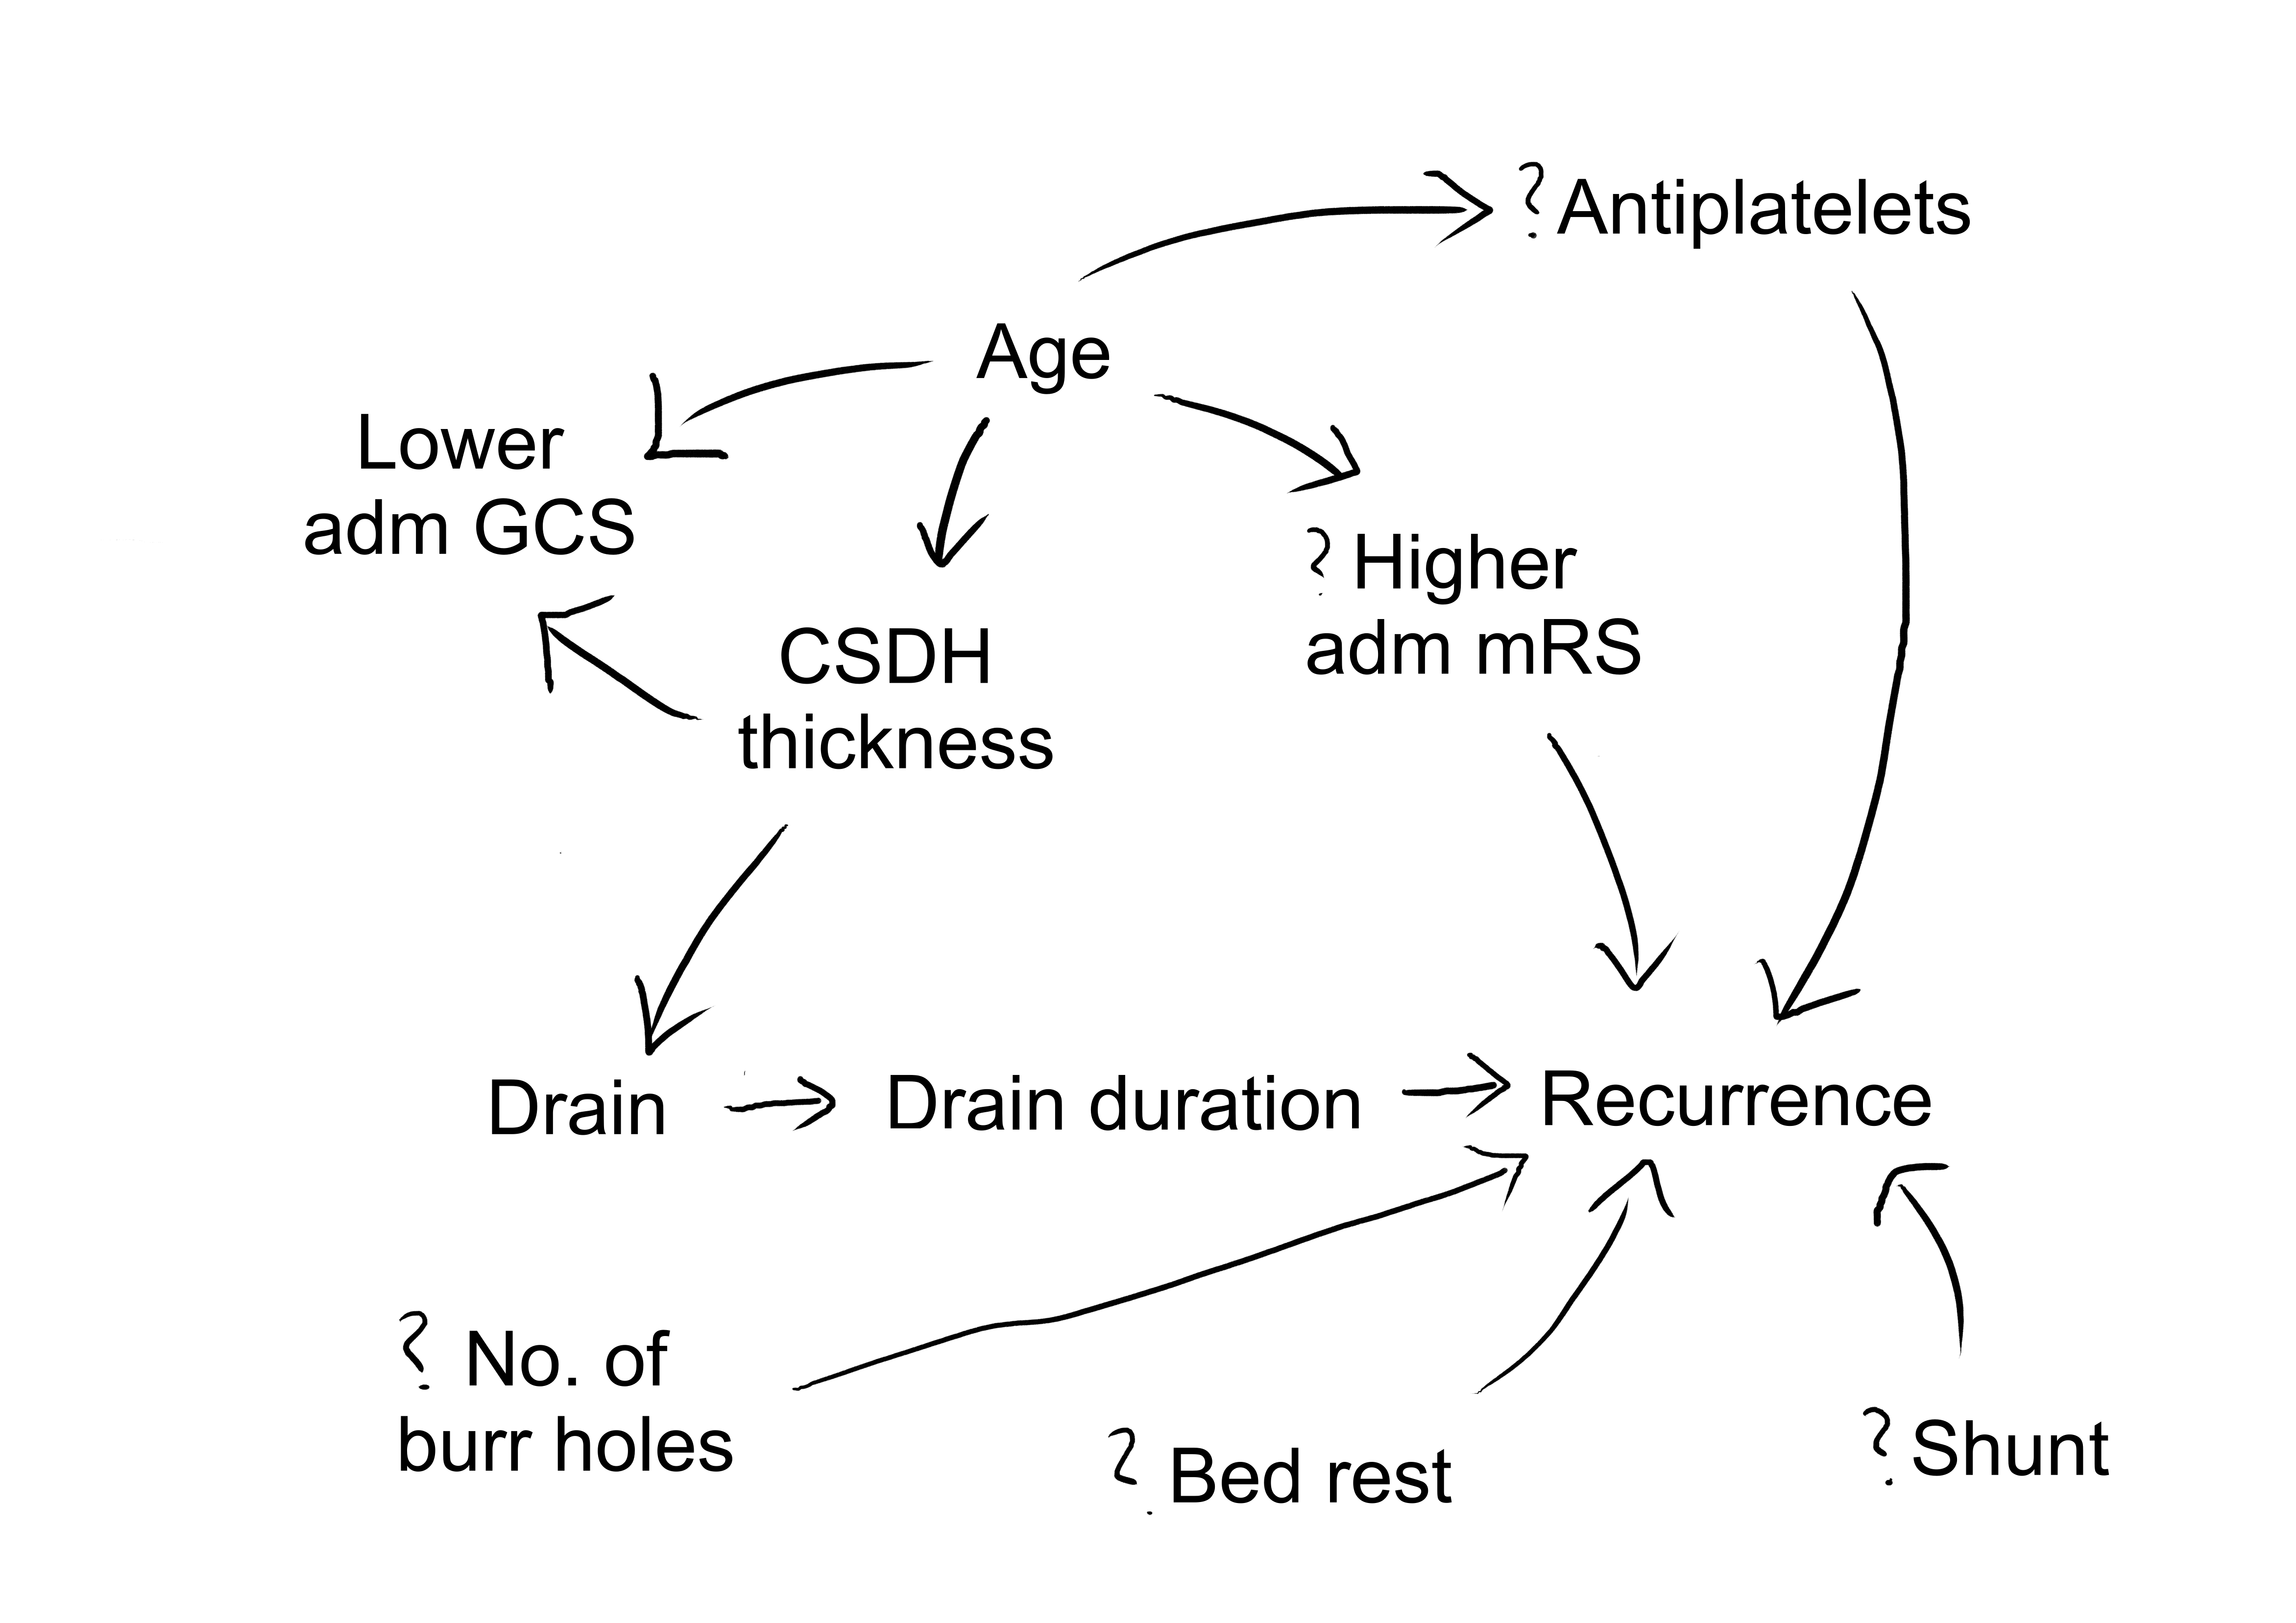

## Thickness

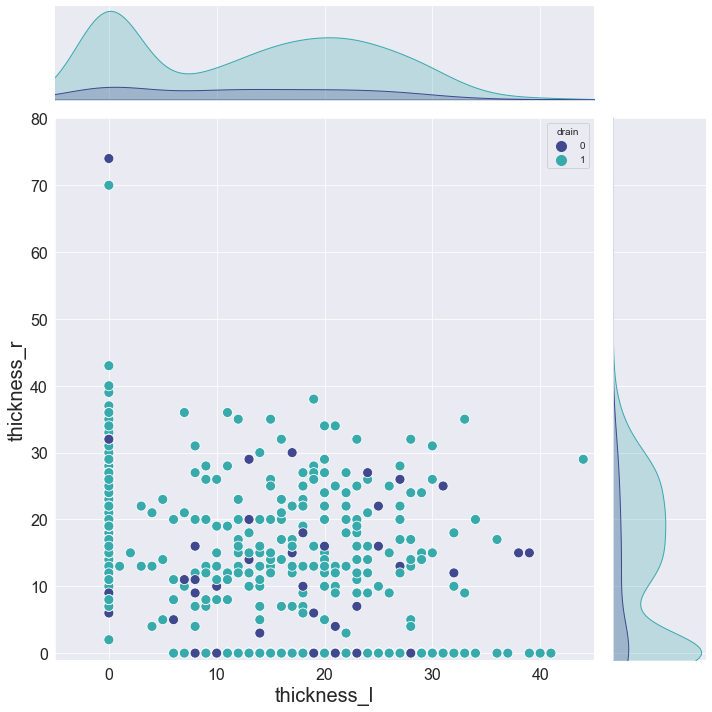

In [20]:
ax = sns.jointplot(data=csdh, 
                   x="thickness_l", 
                   y="thickness_r", 
                   hue="drain", 
                   ax=ax,
                   xlim=(-5,45),
                   ylim=(-1, 80),
                   height=10, palette=sns.color_palette("mako", 2))
plt.show()

### Let's have a look at those patients who have measurements for both `thickness_l` and `thickness_r` grouped by the `drain variable`.

In [21]:
csdh_thick = csdh[(csdh['thickness_l'] != 0) & (csdh['thickness_r'] != 0)]

### No obvious patterns emerging

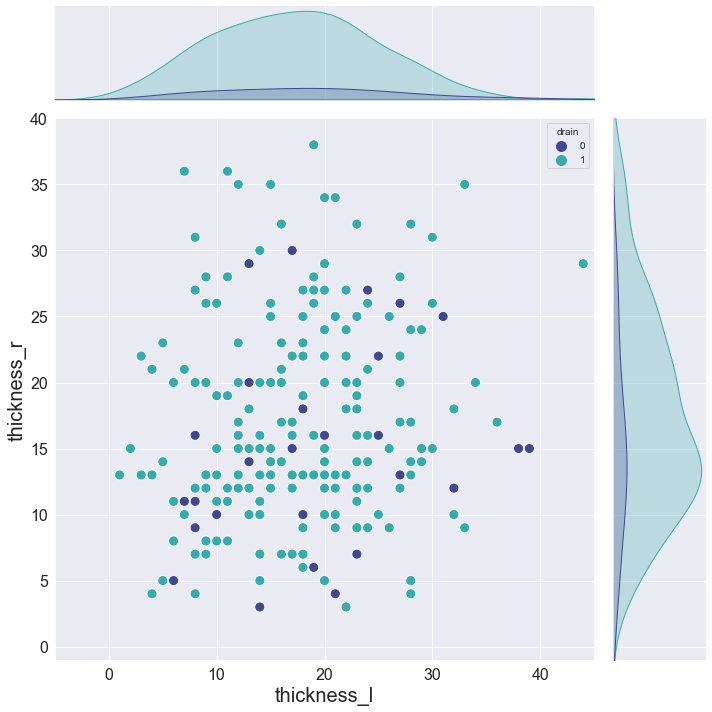

In [22]:
ax = sns.jointplot(data=csdh_thick, 
                   x="thickness_l", 
                   y="thickness_r", 
                   hue="drain", 
                   ax=ax,
                   xlim=(-5,45),
                   ylim=(-1, 40),
                   height=10, palette=sns.color_palette("mako", 2))
plt.show()

### What if we grouped by surgeon? Paul and Michael mentioned that senior surgeons often take over if there are complications? Maybe complications are more likely to arise if the hematoma is larger?

### Nope.

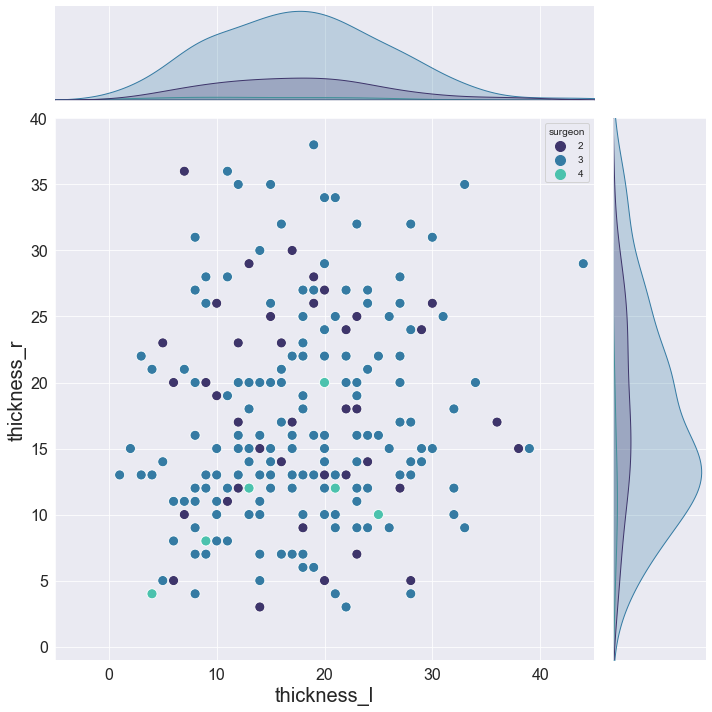

In [23]:
ax = sns.jointplot(data=csdh_thick, 
                   x="thickness_l", 
                   y="thickness_r", 
                   hue="surgeon", 
                   ax=ax,
                   xlim=(-5,45),
                   ylim=(-1, 40),
                   height=10, palette=sns.color_palette("mako", 3))
plt.show()